# A2.1 Regresión logística y validación cruzada

En esta actividad trabajaremos con la misma base de datos que trabajamos en nuestro proyecto anterior donde aplicamos los conocimientos regresiones lineales, con la variante de que ahora nos encontraremos con problemasde clasificación que nos permitirán aprender diferentes lógicas de IA y aprendizaje de máquinas.

Lo datos para trabajar se recuperaron de La Organización Mundial de la Salud (OMS), a través de su Observatorio Mundial de la Salud (GHO), se recopiló y monitoreo información sobre el estado de salud y otros factores asociados en todos los países. Sus conjuntos de datos están disponibles públicamente para el análisis de información relacionada con la salud. Para recopilar los datos se utilizó un conjunto de datos sobre la esperanza de vida y factores de salud de 193 países, obtenido del repositorio de la OMS, complementado con datos económicos extraídos del sitio web de las Naciones Unidas.

El archivo consolidado contiene 22 columnas y 2938 filas, lo que representa un total de 20 variables predictoras. Estas variables se agruparon en cuatro grandes categorías: factores relacionados con la inmunización, factores de mortalidad, factores económicos y factores sociales.

Objetivos del Proyecto:

El objetivo de este proyecto es desarrollar un modelo de clasificación basado en Regresión Logística, con al intención de analizar el efecto de diferentes factores socioeconómicos y de salud en la esperanza de vida de los países. 

1. Buscaremos seleccionar las características más relevantes que afectan la esperanza de vida.

2. Construiremos y evaluaremos un modelo de clasificación, midiento su desempeño mediante métricas como exactitud, sensibilidad, especificidad y curvas ROC-AUC.

3. Interpretaremos los coeficientes del modelo para entender el impacto de cada variable en la clasificación.

1. Primero que nada importamos los datos al ambiente de trabajo. La variable de salida será una clasificasión entre jovenes, adultos y viejos, proximamente se especcificarán los randos de eades para cada uno de ellos. Antes de esto limpiamos la base de datos de la misma forma en la que lo hicimos en el proyecto1.

In [51]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv('Life_Expectancy_Dat.csv')

# Mostrar las primeras filas del conjunto de datos
df.head()

# Obtener información general del DataFrame
df.info()

# Mostrar estadísticas descriptivas
df.describe()

# Verificar los nombres de las columnas en el DataFrame
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

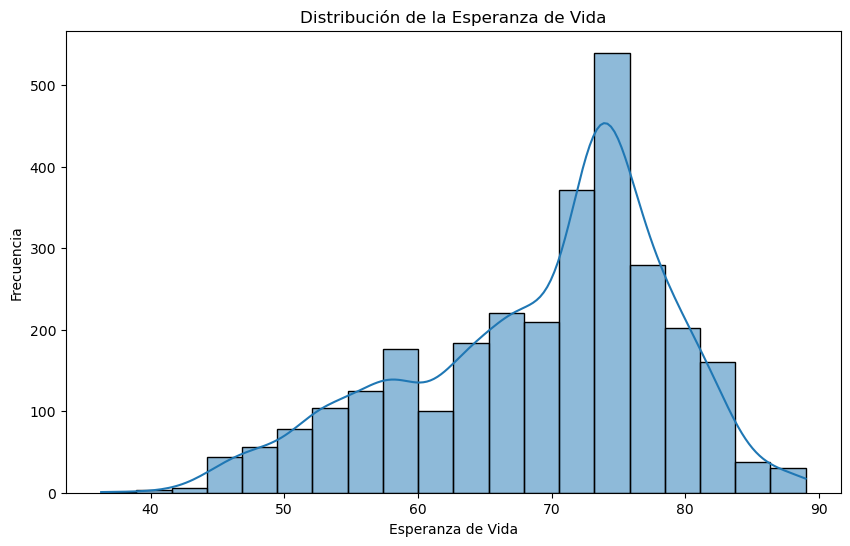

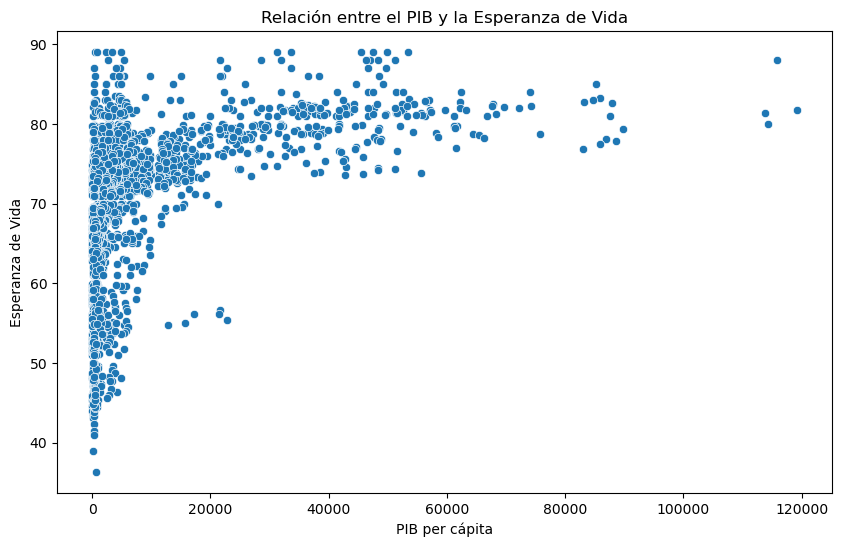

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la distribución de la esperanza de vida
plt.figure(figsize=(10, 6))
sns.histplot(df['Life expectancy '], bins=20, kde=True)
plt.title('Distribución de la Esperanza de Vida')
plt.xlabel('Esperanza de Vida')
plt.ylabel('Frecuencia')
plt.show()

# Graficar la relación entre el PIB y la esperanza de vida
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GDP', y='Life expectancy ')
plt.title('Relación entre el PIB y la Esperanza de Vida')
plt.xlabel('PIB per cápita')
plt.ylabel('Esperanza de Vida')
plt.show()

In [55]:
# Verificar la cantidad de valores faltantes por columna
print("Valores faltantes antes de la solución:")
print(df.isnull().sum())

# Imputar los valores faltantes en las columnas numéricas con la mediana
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['Life expectancy '] = df['Life expectancy '].fillna(df['Life expectancy '].median())

# Verificar después de la imputación
print("\nValores faltantes después de la solución:")
print(df.isnull().sum())


# Calcular los percentiles 25 y 75 para la columna 'GDP' y 'Life expectancy'
Q1 = df['GDP'].quantile(0.25)
Q3 = df['GDP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
df_filtered = df[(df['GDP'] >= lower_bound) & (df['GDP'] <= upper_bound)]

# Mostrar las diferencias en la cantidad de filas
print("\nCantidad de filas antes de eliminar los valores atípicos:", len(df))
print("Cantidad de filas después de eliminar los valores atípicos:", len(df_filtered))



# Verificar tipos de datos antes de aplicar la solución
print("\nTipos de datos antes de la solución:")
print(df.dtypes)



# Verificar después de la conversión
print("\nTipos de datos después de la solución:")
print(df.dtypes)


# Imprimir la base de datos completa
print("\nBase de datos después de la limpieza:")
print(df)




#Eliminar una columna (por ejemplo, 'nombre_columna') # esta columna indica que todas las observaciones (países) están en ví de desarrollo.
df = df.drop(columns=['Status','Country','Income composition of resources'])

# Verificar si la columna fue eliminada
print(df.head())


# Llenar valores faltantes con la mediana de cada columna flotante
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include=['float']).fillna(df.median())

# Convertir todas las columnas flotantes a enteros
df = df.astype({col: 'int' for col in df.select_dtypes(include=['float']).columns})


Valores faltantes antes de la solución:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Valores faltantes después de la solución:
Country                              0
Year   

In [57]:
# Eliminar las columnas 'Life expectancy ' y 'Age_Group'
df = df.drop(columns=['under-five deaths ', ' thinness 5-9 years'])

# Verificar que las columnas fueron eliminadas
df.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,Schooling
0,2015,65,263,62,0,71,65,1154,19,6,8,65,0,584,33736494,17,10
1,2014,59,271,64,0,73,62,492,18,58,8,62,0,612,327582,17,10
2,2013,59,268,66,0,73,64,430,18,62,8,64,0,631,31731688,17,9
3,2012,59,272,69,0,78,67,2787,17,67,8,67,0,669,3696958,17,9
4,2011,59,275,71,0,7,68,3013,17,68,7,68,0,63,2978599,18,9


In [59]:
# Importar las bibliotecas necesarias
import pandas as pd

# Cargar el dataset
df = pd.read_csv("Life_Expectancy_Dat.csv")

# Definir la variable de salida
target_variable = 'Life expectancy '

# Crear la nueva variable categórica
def clasificar_edad(esperanza_vida):
    if esperanza_vida < 45:
        return 0  # Jóvenes
    elif 45 <= esperanza_vida <= 65:
        return 1  # Adultos
    else:
        return 2  # Viejos

df['Age_Group'] = df[target_variable].apply(clasificar_edad)

# Verificar la distribución de clases
df['Age_Group'].value_counts()


Age_Group
2    2074
1     845
0      19
Name: count, dtype: int64

2. Separaremos los datos en entrenamiento y prueba, con una relación de 80/20. Asegurándonos de
mantener un balance de clases (es decir, si en la base de datos hay 70% de
observaciones de clase 0 y 30% de observaciones de clase 1, deberá mantenerse una
proporción muy similar tanto en los datos de entrenamiento como en los de prueba), por ello,
imprimiremos en consola las proporciones para los 3 grupos (datos originales, datos de
entrenamiento, datos de prueba) corroboranod similitud.

In [61]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split

# Separar las características (X) y la variable objetivo (y)
X = df.drop(columns=['Life expectancy ', 'Age_Group'])  # Eliminar la columna 'Age_Group' y 'Life expectancy '
y = df['Age_Group']  # La variable objetivo es la nueva clasificación de edad

# Separar los datos en entrenamiento y prueba con una relación de 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Imprimir las proporciones de las clases en los tres conjuntos de datos
print("Proporción de clases en el conjunto original:")
print(y.value_counts(normalize=True))

print("\nProporción de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporción de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))


Proporción de clases en el conjunto original:
Age_Group
2    0.705922
1    0.287611
0    0.006467
Name: proportion, dtype: float64

Proporción de clases en el conjunto de entrenamiento:
Age_Group
2    0.705957
1    0.287660
0    0.006383
Name: proportion, dtype: float64

Proporción de clases en el conjunto de prueba:
Age_Group
2    0.705782
1    0.287415
0    0.006803
Name: proportion, dtype: float64


# Cometarios:
Existe poca variabilidad entre los los datos de entrenamiento y de test con respecto al conjunto complto, lo quenos sugieren buenas proporciones para trabajarlos.

3. Usando los datos de entrenamiento, mediremos la exactitud de un modelo de regresión logística usando validación cruzada. Debido a la complejidad de la base de datos utilizaremos las 5 variables de mayor relevancia. Es posible que tengamos que hacer adecuaciones en los datos cómo eliminar valores faltantes para poder correr la validación cruzada.


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las 5 características de interés (ajustar esto según tus necesidades)
# Por ejemplo, seleccionamos 5 columnas numéricas para ilustrar
X_train_selected = X_train[['GDP', 'Income composition of resources', 'Schooling', 'Alcohol', 'Polio']]

# Eliminar las filas con valores faltantes
X_train_selected_cleaned = X_train_selected.dropna()

# Asegurarnos de que 'y_train' también tenga las mismas filas eliminadas
y_train_cleaned = y_train[X_train_selected_cleaned.index]

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected_cleaned)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=7)

# Realizar validación cruzada con 5 pliegues (k-fold)
cv_scores = cross_val_score(model, X_train_scaled, y_train_cleaned, cv=5, scoring='accuracy')

# Imprimir los resultados de la validación cruzada
print(f"Exactitudes de los 5 pliegues de validación cruzada: {cv_scores}")
print(f"Exactitud promedio (media) de la validación cruzada: {cv_scores.mean()}")



Exactitudes de los 5 pliegues de validación cruzada: [0.91397849 0.85483871 0.88172043 0.89247312 0.89218329]
Exactitud promedio (media) de la validación cruzada: 0.887038808219575


# Comentarios:

El modelo logístico muestra un rendimiento en general positivo, con una precisión media del 88.7% en la validación cruzada.  A pesar de la variabilidad entre los pliegues entre el 85.5% y el 91.4%, la cercanía que hay entre los resultados sugieren que el modelo es estable y confiable.  Esto señala que las propiedades seleccionadas en el proceso tienen significancia en la clasificación, y que el modelo obtiene una buena generalización de los datos.  

Es importante recordar que tenemos muchas variables entonces se podrían investigar otras estrategias de optimización o modelos extra para mejorar aún más su desempeño, sin embargo por lo pronto nos quedaremos con este buen desempeño.


4. Entrenaremos un modelo de regresión logística, similar al del punto anterior, pero utilizando
todo el subconjunto de datos de entrenamiento. Usando dicho modelo, generaremos un vector
de probabilidades para los datos de prueba. Generaremos una matriz de confusión y reportaremos la
exactitud, sensibilidad y especificidad del modelo antes 3 diferentes umbrales (0.5, uno
mayor, y uno menor).

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las 5 características de interés para el conjunto de entrenamiento
X_train_selected = X_train[['GDP', 'Income composition of resources', 'Schooling', 'Alcohol', 'Polio']]

# Eliminar las filas con valores faltantes antes de la normalización
X_train_selected_cleaned = X_train_selected.dropna()

# Asegurarnos de que 'y_train' también tenga las mismas filas eliminadas
y_train_cleaned = y_train[X_train_selected_cleaned.index]

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected_cleaned)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000, random_state=7)
model.fit(X_train_scaled, y_train_cleaned)

# Seleccionar las mismas 5 características para el conjunto de prueba
X_test_selected = X_test[['GDP', 'Income composition of resources', 'Schooling', 'Alcohol', 'Polio']]

# Eliminar las filas con valores faltantes en los datos de prueba
X_test_selected_cleaned = X_test_selected.dropna()

# Asegurarnos de que 'y_test' también tenga las mismas filas eliminadas
y_test_cleaned = y_test[X_test_selected_cleaned.index]

# Normalizamos las características de prueba
X_test_scaled = scaler.transform(X_test_selected_cleaned)

# Generar el vector de probabilidades para los datos de prueba
probabilities = model.predict_proba(X_test_scaled)[:, 1]  # Probabilidades de la clase positiva

# Función para calcular la matriz de confusión y métricas
def calcular_metricas(probabilities, y_true, umbral):
    y_pred = (probabilities >= umbral).astype(int)  # Convertir las probabilidades en etiquetas de clase según el umbral
    
    # Matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    # Exactitud
    accuracy = accuracy_score(y_true, y_pred)
    
    # Sensibilidad (recall)
    sensitivity = recall_score(y_true, y_pred, average='macro')  # Cambié 'binary' a 'macro' para multiclase
    
    # Especificidad
    specificity = recall_score(y_true, y_pred, average='micro')  # Cambié 'binary' a 'micro' para multiclase
    
    return cm, accuracy, sensitivity, specificity


umbrales = [0.3, 0.5, 0.7]  # Lista con los umbrales a evaluar


# Calcular métricas para cada umbral
for umbral in umbrales:
    cm, accuracy, sensitivity, specificity = calcular_metricas(probabilities, y_test_cleaned, umbral)
    
    print(f"\nMétricas para umbral = {umbral}:")
    print(f"Matriz de confusión:\n{cm}")
    print(f"Exactitud: {accuracy}")
    print(f"Sensibilidad: {sensitivity}")
    print(f"Especificidad: {specificity}")



Métricas para umbral = 0.3:
Matriz de confusión:
[[  0   4   0]
 [ 23 122   0]
 [279  33   0]]
Exactitud: 0.2646420824295011
Sensibilidad: 0.28045977011494255
Especificidad: 0.2646420824295011

Métricas para umbral = 0.5:
Matriz de confusión:
[[  1   3   0]
 [ 44 101   0]
 [291  21   0]]
Exactitud: 0.22125813449023862
Sensibilidad: 0.3155172413793103
Especificidad: 0.22125813449023862

Métricas para umbral = 0.7:
Matriz de confusión:
[[  2   2   0]
 [ 69  76   0]
 [302  10   0]]
Exactitud: 0.16919739696312364
Sensibilidad: 0.34137931034482766
Especificidad: 0.16919739696312364


# Comentarios:

Se aprecia una baja exactitud debido a que modelo tiene un desempeño deficiente en todos los umbrales (máx. 26.46%), lo que indica que la regresión logística no clasifica bien los datos.

La sensibilidad aumenta ligeramente con umbrales más altos, pero no lo suficiente para compensar la baja exactitud.

Un posible desbalance de clases ya que algunas categorías no se predicen bien, lo que sugiere la necesidad de balancear los datos.

El modelo no diferencia bien las clases de la matriz de confusión, muestra errores significativos, especialmente en la clase 2, que no se predice correctamente.


5. Graficaremos la curva ROC para las probabilidades calculadas en el punto previo y reportaremos el
valor de la AUC.

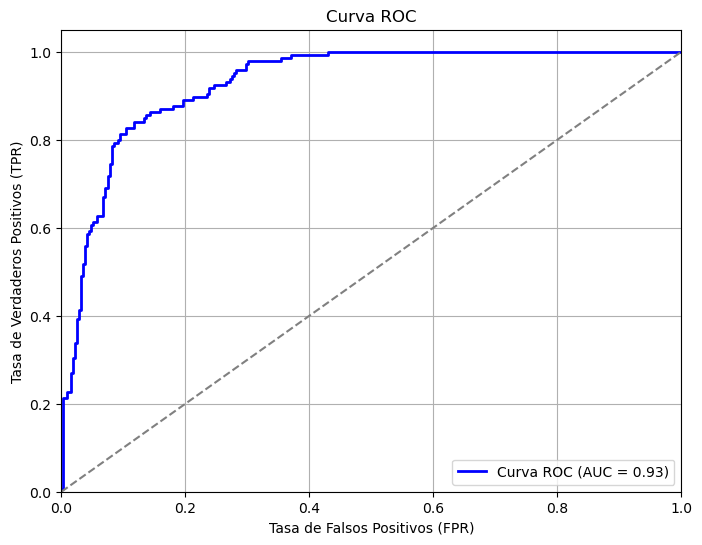

Área Bajo la Curva (AUC): 0.9300


In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calcular la Curva ROC
fpr, tpr, thresholds = roc_curve(y_test_cleaned, probabilities, pos_label=1)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()

# Mostrar la gráfica
plt.show()

# Reportar el valor de AUC
print(f'Área Bajo la Curva (AUC): {roc_auc:.4f}')


# Comentarios:
La gráfica ROC obtenida muestra un desempeño aceptable del modelo, ya que se encuentra alta la tendencia a 1.0 es decir que está considerablemente por encima de la diagonal. El área bajo la curva (AUC) de 0.93 indica una alta capacidad de discriminación entre las clases.

Un AUC alto como lo es el 0.93 sugiere que el modelo distingue correctamente entre clases en la mayoría de los casos.
La curva tiene una pendiente pronunciada al inicio, lo que nos indica que tiene una alta sensibilidad para bajos niveles de falsos positivos.

Aunque el modelo es bueno, es recomendable evaluar el impacto de distintos umbrales para encontrar el equilibrio óptimo entre sensibilidad y especificidad, siendo guiados por el contexto de la investigación. En este caso nos interesa máyir precisión en las edades críticas donde nos acercamos al fallecimiento de las personas, y no tanto por si están muy jóvenes o entrando a la adultez.


6. Comentaremos sobre los resultados del modelo, describiremos cómo es que cada variable afecta a la
salida, en términos de los coeficientes generados.

In [69]:
import pandas as pd

# Obtener los coeficientes del modelo
coeficientes = model.coef_[0]  # model.coef_ devuelve una matriz, tomamos la primera fila

# Crear un DataFrame para visualizar mejor los resultados
variables = ['GDP', 'Income composition of resources', 'Schooling', 'Alcohol', 'Polio']
coef_df = pd.DataFrame({'Variable': variables, 'Coeficiente': coeficientes})

# Ordenar por magnitud del coeficiente
coef_df = coef_df.sort_values(by='Coeficiente', ascending=False)

# Mostrar la tabla de coeficientes
print(coef_df)


                          Variable  Coeficiente
3                          Alcohol     0.263837
4                            Polio    -0.166012
2                        Schooling    -0.405101
1  Income composition of resources    -0.417895
0                              GDP    -0.789106


Los coeficientes del modelo indican que el PIB per cápita (-0.79) es el factor más influyente, nos permite inferir que países con mayores ingresos tienen mejores condiciones de salud. Del mismo modo, la educación con un (-0.40) y el acceso a recursos con un (-0.42) reducen la probabilidad de caer o pobreza lo cual es lógic pero destacando su papel protector e importante en salud individual y clectiva.

La vacunación contra la polio con un (-0.16) también muestra un efecto positivo en la reducción del riesgo. De froma particular y como lo pudimos ver en el proyecto anterior el consumo de alcohol (+0.26) es la única variable con un coeficiente positivo, lo que sugiere una posible correlación con otros factores de riesgo, y esto al unilo con el contextro que nosotros como investigadores llega a tener mucho sentido. En general, los factores económicos, educativos y de salud pública son determinantes clave en la predicción del estado de salud de una población.

# Referencias:

OpenAI. (2025). ChatGPT (Versión GPT-4). https://chat.openai.com

KumarRajarshi. (2015). Life Expectancy (WHO). Kaggle.com. https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download

-Doy mi palabra que he realizado esta actividad con integridad académica.